<a href="https://colab.research.google.com/github/shashithenuwara/FDM-MINI_project/blob/main/Random_Forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

**Read the Dataset**

In [2]:
df_before = pd.read_csv("Sleep_Data_Sampled.csv")

In [3]:
columnsToDrop = ["Person ID","Sleep Duration","Daily Steps"]
df = df_before.drop(columns=columnsToDrop,axis = 1)

**1.Data Cleaning**

**Handle Missing Values(Using Global Constant)**

In [4]:
# Replace missing values in numeric columns with 0
df.fillna({col: 0 for col in df.select_dtypes(include='number').columns}, inplace=True)

# Verify if missing values are handled
df.isnull().sum()


,0
Gender,0
Age,0
Occupation,0
Quality of Sleep,0
Physical Activity Level,0
Stress Level,0
BMI Category,0
Blood Pressure,0
Heart Rate,0
Fatigue Score,0


**Handle Noisy Data** (Replace minus valuse in Fatigue Score coloumn with mean value)

In [5]:
# Calculate the mean of valid (non-negative) Fatigue Score values
mean_fatigue_score = df[df['Fatigue Score'] >= 0]['Fatigue Score'].mean()

# Replace negative values in Fatigue Score with the mean value
df['Fatigue Score'] = df['Fatigue Score'].apply(lambda x: mean_fatigue_score if x < 0 else x)

# Verify changes
df['Fatigue Score'].describe()

,Fatigue Score
count,15000.000000
mean,8.004071
std,3.150786
min,0.000000
25%,6.820000
50%,7.730000
75%,9.930000
max,15.250000


**Handle Non-Numerical Valus**

In [6]:
def convert_blood_pressure(bp):
    try:

        systolic, diastolic = map(int, bp.split('/'))
        return (systolic + diastolic) / 2  # Example: return the average
    except:
        return None

In [7]:
df['Blood Pressure'] = df['Blood Pressure'].apply(convert_blood_pressure)

**2.Data Transformation**

In [8]:
# Selecting the numeric columns for normalization
numeric_columns = ['Quality of Sleep', 'Physical Activity Level',
                   'Stress Level', 'Heart Rate', 'Fatigue Score']

**Get Numeric Values to 0-10 Scale**

In [9]:
# Initialize the MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 10))

# Apply the scaler to the numeric columns

df[numeric_columns] = scaler.fit_transform(df[numeric_columns])

df[numeric_columns] = df[numeric_columns].round(2)

**3.Data Mining**

In [10]:
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

**Encode Categorical Variables using One-Hot Encoding**

In [11]:
from sklearn.preprocessing import LabelEncoder

# Encode categorical columns
label_encoder = LabelEncoder()

df['Encoded_Column_Gender'] = label_encoder.fit_transform(df['Gender'])
df['Encoded_Column_Occupation'] = label_encoder.fit_transform(df['Occupation'])
df['Encoded_Column_BMI Category'] = label_encoder.fit_transform(df['BMI Category'])
#df['Encoded_Column_Sleep Disorder'] = label_encoder.fit_transform(df['Sleep Disorder'])

In [12]:
df = pd.get_dummies(df, columns=['Gender'],)
df = pd.get_dummies(df, columns=['Occupation'])
df = pd.get_dummies(df, columns=['BMI Category'])
#df = pd.get_dummies(df, columns=['Sleep Disorder'])

**Split dataset into Features(X) and Target(y)**

In [13]:
X = df.drop('Sleep Disorder', axis=1)
y = df['Sleep Disorder']

**Train-Test Split**

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

**Train the Random Forest Classifier**

In [15]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)



RandomForestClassifier(random_state=42)

**Predict On Test Data**

In [16]:
y_pred = rf_model.predict(X_test)


**4.Evaluation**

**Accuracy, F1 Score and Classification Report**

In [17]:
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Accuracy: {accuracy:.2f}")
print(f"F1 Score: {f1:.2f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.96
F1 Score: 0.96

Classification Report:
              precision    recall  f1-score   support

     Healthy       0.95      0.96      0.95      1514
    Insomnia       0.97      0.95      0.96      1494
 Sleep Apnea       0.95      0.97      0.96      1492

    accuracy                           0.96      4500
   macro avg       0.96      0.96      0.96      4500
weighted avg       0.96      0.96      0.96      4500



**Confusion Matrix**

In [18]:
conf_matrix = confusion_matrix(y_test, y_pred)

**5.Visualization**





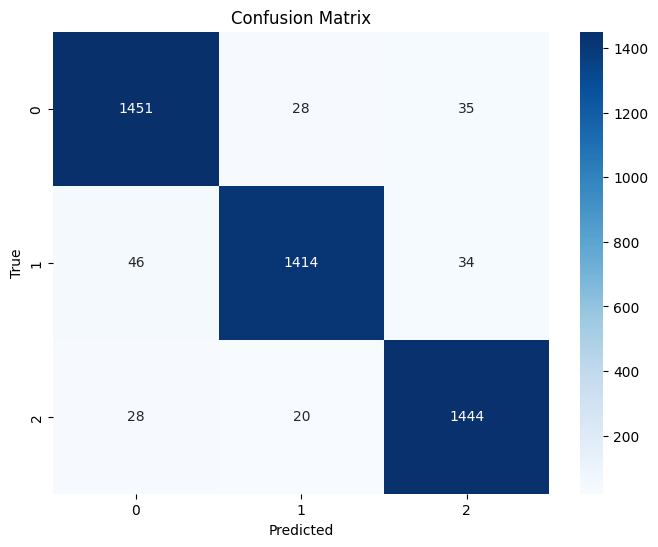

In [19]:
# Visualize Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()



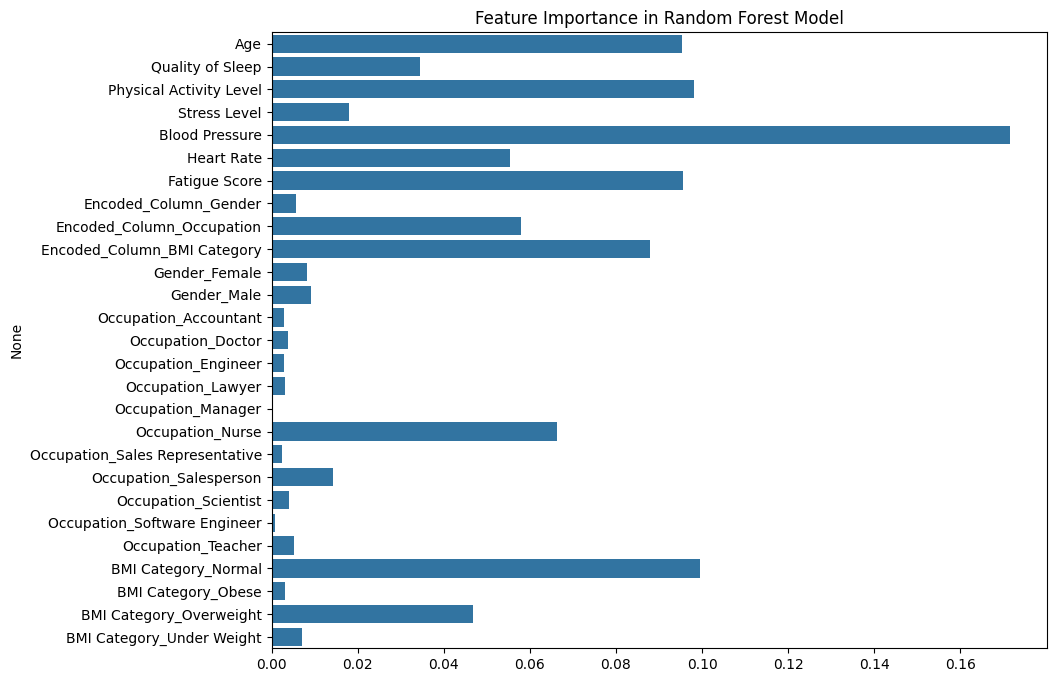

In [20]:
# Feature importance
feature_importances = rf_model.feature_importances_
features = X.columns

# Plot feature importance
plt.figure(figsize=(10, 8))
sns.barplot(x=feature_importances, y=features)
plt.title('Feature Importance in Random Forest Model')
plt.show()